# Ligand-based validation

Check if we can retrieve on-/off-targets for a selected ligand (as reported by Karaman et al.) solely based on the structurally most similar kinases to respective main target of that ligand.

1. Select ligands to investigate: Erlotinib and Imatinib (target ligands).
2. Get target of Erlotinib and Imatinib: EGFR and ABL1 (target kinases).
3. Find top20 and top30 similar kinases to target kinase.
4. Save these top kinases in KinMap format for visualization using the KinMap website.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from kissim.comparison import FingerprintDistanceGenerator

In [3]:
HERE = Path(_dh[-1])  # noqa: F821
DATA = HERE / "../../results/"

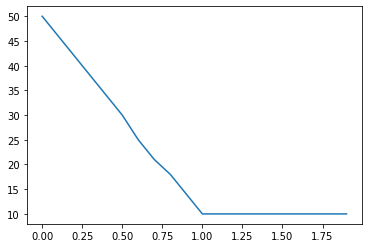

In [30]:
def kinmap_size(x):
    if x > 1:
        return 10
    else:
        return int(10+(1-x)*40)
    
dummy_distances = np.arange(0, 2, 0.1)
plt.plot(dummy_distances, [kinmap_size(i) for i in dummy_distances]);

In [24]:
def write_top_n_kinases_to_kinmap_file(kinase_matrix, target_kinase, top_n, target_ligand, output_path=None):
    
    # Save all kinases
    all_kinases = kinase_matrix.index.to_list()
    all_kinases = pd.DataFrame(all_kinases, columns=["xName"])
    all_kinases["size"] = 50
    all_kinases["shape"] = "pentagon"
    all_kinases["fill"] = "Grey"
    all_kinases["stroke"] = "Grey"
    
    # Save top N kinases
    top_kinases = kinase_matrix[target_kinase].sort_values(ascending=True)[:top_n]
    top_kinases.name = "size"
    top_kinases.index.name = "xName"
    top_kinases = top_kinases.reset_index()
    top_kinases["size"] = top_kinases["size"].apply(kinmap_size)
    top_kinases["shape"] = "pentagon"
    top_kinases["fill"] = "Cyan"
    top_kinases["stroke"] = "Cyan"
    
    kinmap = pd.concat([all_kinases, top_kinases])

    if output_path is not None:
        kinmap.to_csv(
            Path(output_path) / f'kinmap_{target_kinase}_{target_ligand}_top{top_n}.csv',
            index=False
        )

    return kinmap

In [6]:
def main(kinase_matrix, target_kinase, target_ligand, output_path):
    
    # Generate KinMap file format
    write_top_n_kinases_to_kinmap_file(kinase_matrix, target_kinase, 20, target_ligand, output_path)
    write_top_n_kinases_to_kinmap_file(kinase_matrix, target_kinase, 30, target_ligand, output_path)
    write_top_n_kinases_to_kinmap_file(kinase_matrix, target_kinase, 50, target_ligand, output_path)

## Load kinase matrix

In [7]:
fingerprint_distance_generator_path = DATA / "fingerprint_distances_41-41-41-41-41-41-41-41-83-83-83-83-111-111-111.json"
fingerprint_distance_generator = FingerprintDistanceGenerator.from_json(fingerprint_distance_generator_path)

In [8]:
kinase_matrix = fingerprint_distance_generator.kinase_distance_matrix("minimum")

## Off-targets for EGFR (Erlotinib)

In [31]:
sb = write_top_n_kinases_to_kinmap_file(kinase_matrix, target_kinase, 20, target_ligand)

In [32]:
sb

,xName,size,shape,fill,stroke
0,AAK1,50,pentagon,Grey,Grey
1,ABL1,50,pentagon,Grey,Grey
2,ABL2,50,pentagon,Grey,Grey
3,ACK,50,pentagon,Grey,Grey
4,ACTR2,50,pentagon,Grey,Grey
...,...,...,...,...,...
15,LCK,45,pentagon,Cyan,Cyan
16,JAK2,45,pentagon,Cyan,Cyan
17,RON,45,pentagon,Cyan,Cyan
18,ABL2,45,pentagon,Cyan,Cyan


In [23]:
lb = pd.read_csv("results/kinmap_EGFR_erlotinib.csv")
lb

,xName,size,shape,fill,stroke,strokeWidth,Kd(nM),KMap-name,KMap-type,KMap-source,KMap-setId
0,EGFR,50,circle,Orange,LightGray,1.5,0.67,Erlotinib,"Karaman et al., 2008",Profiling,BK5
1,GAK,49,circle,Orange,LightGray,1.5,3.10,Erlotinib,"Karaman et al., 2008",Profiling,BK5
2,LOK,46,circle,Orange,LightGray,1.5,19.00,Erlotinib,"Karaman et al., 2008",Profiling,BK5
3,SLK,43,circle,Orange,LightGray,1.5,26.00,Erlotinib,"Karaman et al., 2008",Profiling,BK5
4,ABL2,17,circle,Orange,LightGray,1.5,200.00,Erlotinib,"Karaman et al., 2008",Profiling,BK5
5,BLK,17,circle,Orange,LightGray,1.5,190.00,Erlotinib,"Karaman et al., 2008",Profiling,BK5
6,ABL1,16,circle,Orange,LightGray,1.5,310.00,Erlotinib,"Karaman et al., 2008",Profiling,BK5
7,ErbB4,16,circle,Orange,LightGray,1.5,230.00,Erlotinib,"Karaman et al., 2008",Profiling,BK5
8,LCK,16,circle,Orange,LightGray,1.5,250.00,Erlotinib,"Karaman et al., 2008",Profiling,BK5
9,AAK1,15,circle,Orange,LightGray,1.5,1200.00,Erlotinib,"Karaman et al., 2008",Profiling,BK5


In [33]:
# Experiment
target_kinase = "EGFR"
target_ligand = "erlotinib"

main(kinase_matrix, target_kinase, target_ligand, "results")

## Off-targets for ABL1 (Imatinib)

In [ ]:
# Experiment 2
target_kinase = 'ABL1'
target_ligand = 'imatinib'

main(kinase_matrix, target_kinase, target_ligand)